# Import Modules

In [1]:
# Import modules
import easygui 
import nbimporter
import numpy as np
import pandas as pd
import re
import threading
import time
import xlwings as xw
import unidecode
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from wordcloud import WordCloud
from thefuzz import fuzz
from openpyxl.utils import column_index_from_string
from openpyxl.utils import get_column_letter
from pathlib import Path
from findfiles import FindFiles 
from datatransfer import ImportData, ExportData

# Search for Excel File Paths

In [2]:
# Search for files and output as text file (uncomment line below)
# find_files = FindFiles()

# Analysis DataFrame

In [3]:
# Add excel file or files to "import_list"
import_list = [
    Path.home().joinpath(*["Desktop","ScopingData","7. Data Extraction (29-May-2023).xlsx"]) 
]

# Make instance of "ImportData" class
import_data = ImportData(files_for_import = import_list, 
                         worksheet_index = 0, # worksheet name or index (0 is index 1 in excel)
                         headings_data_row = 1,  # row of column headings (1 is row 2 in excel)
                         index_column = None,  
                         right_data_column = "ZZ", 
                         has_spacing_columns = True, 
                         column_to_copy = "Key") # set an column to act as index 

# Import the dataframe
import_data.make_dataframes()

# Name the dataframe
dataframe_one = import_data.dataframe

Excel files imported:

7. Data Extraction (29-May-2023).xlsx       62 rows   51 Columns


&nbsp;


# Export Dataframe

In [4]:
# Make instance of "ExportData" class
export_data = ExportData(dataframe_one, f"data_extracted {dataframe_one.shape}")

# Export dataframe to excel
export_data.export_to_excel()

&nbsp;

# Initial Data Processing

In [5]:
# Fill missing values with N/A and strip all strings of whitespace
dataframe_one = dataframe_one.fillna('N/A') \
                             .applymap(lambda x: x.strip() if isinstance(x, str) else x) \
                             .replace()

# Update N/A values in specific columns
columns_to_replace = ['Num. Males', 'Num. Females', 'Average Age', 'Type of Evidence', 'Secondary Staging', 'Muscle Seg.', 'SAT Seg.', 'VAT Seg.', 'Multivariate Analysis']
dataframe_one[columns_to_replace] = dataframe_one[columns_to_replace].replace(['N/A', np.nan], 'Not Stated')

# Drop the key row (the correct column check row)
dataframe_one = dataframe_one.drop('Key')

# Convert to years
dataframe_one['Year of Publication'] = pd.to_datetime(dataframe_one['Year of Publication'], format='%Y').dt.year

# Convert specified columns to numeric data type
columns_to_convert = ['Sample Size', 'Num. Males', 'Num. Females', 'Average Age']
dataframe_one[columns_to_convert] = dataframe_one[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Get list of redundant columns
na_values = ['N/A', 'Not Stated']
selected_columns = dataframe_one.columns[dataframe_one.isin(na_values).all()]

# Delete the redundant columns
dataframe_one = dataframe_one.drop(columns=selected_columns)

# List all the dataframe columns
list(dataframe_one.columns)

# Check shape of dataframe
print(dataframe_one.shape)

# Make instance of "ExportData" class
export_data = ExportData(dataframe_one, f"data_extracted {dataframe_one.shape}")

# Export dataframe to excel
export_data.export_to_excel()

(61, 48)


&nbsp;

# Data Charting

In [6]:
import pandas as pd

target_columns = [
    'Total Psoas Area (TSA)',
    'Total Psoas Index (TSI)',
    'Psoas Muscle Density (Myosteatosis)',
    'Skeletal Muscle Area (SMA)',
    'Skeletal Muscle Index (SMI)',
    'Skeletal Muscle Density (Myosteatosis)',
    'Skeletal Muscle Gauge (SMG)',
    'Bone Mineral Density (BMD)',
    'Intermuscular Adipose Tissue (IMAT)',
    'Subcutaneous Adipose Tissue (SAT)',
    'Visceral Adipose Tissue (VAT)',
    'Total Adipose Tissue (TAT)',
    'Relative Visceral Fat Area (rVFA)',
    'Subcutaneous Adipose Tissue Index (SATI)',
    'Visceral Adipose Tissue Index (VATI)',
    'Total Fat Mass Index (TFMI)',
    'Visceral Adipose Tissue Density',
    'Subcutaneous Adipose Tissue Density',
    'Sarcopenic Obesity / Non-Sarcopenic Obesity',
    'Sarcopenia and Adipopenia'
]

output_file = "output.tsv"

output_data = []
for column in target_columns:
    filtered_values = dataframe_one[column].dropna()
    filtered_values = filtered_values[filtered_values != 'N/A']
    value_counts = filtered_values.value_counts()
    largest_values = value_counts.nlargest(3)
    output_data.append([column + '\t', largest_values])

output_df = pd.DataFrame(output_data, columns=['Column', 'Top 2 Value Counts (excluding N/A)'])
output_df.to_csv(output_file, sep='\t', index=False)


In [7]:
target_columns = [
    'Total Psoas Area (TSA)',
    'Total Psoas Index (TSI)',
    'Psoas Muscle Density (Myosteatosis)',
    'Skeletal Muscle Area (SMA)',
    'Skeletal Muscle Index (SMI)',
    'Skeletal Muscle Density (Myosteatosis)',
    'Skeletal Muscle Gauge (SMG)',
    'Bone Mineral Density (BMD)',
    'Intermuscular Adipose Tissue (IMAT)',
    'Subcutaneous Adipose Tissue (SAT)',
    'Visceral Adipose Tissue (VAT)',
    'Total Adipose Tissue (TAT)',
    'Relative Visceral Fat Area (rVFA)',
    'Subcutaneous Adipose Tissue Index (SATI)',
    'Visceral Adipose Tissue Index (VATI)',
    'Total Fat Mass Index (TFMI)',
    'Visceral Adipose Tissue Density',
    'Subcutaneous Adipose Tissue Density',
    'Sarcopenic Obesity / Non-Sarcopenic Obesity',
    'Sarcopenia and Adipopenia'
]

for column in target_columns:
    filtered_values = dataframe_one[column].dropna()
    filtered_values = filtered_values[filtered_values != 'N/A']
    value_counts = filtered_values.value_counts()
    largest_values = value_counts.nlargest(3)
    print()
    print(column)
    print(largest_values)
    print("--------------------")


Total Psoas Area (TSA)
Metric measured (not assessed)                9
Metric measured (not assessed at baseline)    3
No prediction value identified                1
Name: Total Psoas Area (TSA), dtype: int64
--------------------

Total Psoas Index (TSI)
No prediction value identified                2
NRM  (men only)                               1
Metric measured (not assessed at baseline)    1
Name: Total Psoas Index (TSI), dtype: int64
--------------------

Psoas Muscle Density (Myosteatosis)
No prediction value identified    3
OS                                1
Adverse Outcomes                  1
Name: Psoas Muscle Density (Myosteatosis), dtype: int64
--------------------

Skeletal Muscle Area (SMA)
Metric measured (not assessed)                29
No prediction value identified                 5
Metric measured (not assessed at baseline)     1
Name: Skeletal Muscle Area (SMA), dtype: int64
--------------------

Skeletal Muscle Index (SMI)
No prediction value identified    10
OS 

&nbsp;

# Counts

In [8]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts and covert to a dataframe
df = dataframe_one["Type of Cancer"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Year of Publication'}, inplace=True)

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
#filt = df['Year of Publication'] >2000
#df = df[filt]

# Sort the DataFrame by the years
df = df.sort_values('Year of Publication')

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(
    x=df['Year of Publication'].astype(str),  # x values are the years
    y=df['Count'],  # y values are the counts
    text=df['Count'],
    textposition='auto',
    marker=dict(color=gorilla_dark_blue),  # Set the color of the bars to dark blue
))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence By Type of Cancer',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend = False, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=False, # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
        range=[0, 40], # Set y-axis value range
        tick0=0, # Set baseline value
        dtick=2,  # Adjust this value to change the y-axis increment size
    ),
    
    xaxis=dict(
        title='Haematological Cancer Populations',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =0,
    ),
    
    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
    
)
    
# Show the graph
fig.show()

&nbsp;

# Year of Publication


<span style="color:#009966; font-weight:700;">Check The Data</span>

In [9]:
# Get the value counts of "year of publication" groupby "type of evidence" 
target_values  = dataframe_one.groupby("Type of Evidence")["Year of Publication"].value_counts()

# Filter using index
values_to_exclude = []
target_values = target_values[~target_values.index.get_level_values('Year of Publication').isin(values_to_exclude)]

# Filter using values
values_to_exclude = []
target_values = target_values[~target_values.isin(values_to_exclude)]

# Modify specific values using a boolean series
#low_values = target_values <= 4
#high_values = target_values > 4
#target_values.loc[low_values] = "Low"
#target_values.loc[high_values] = "High"

# Get updated value counts
target_values = target_values.value_counts()

# Print the modified values
for year, count in target_values.items():
    print(f"{year}: {count},")

2: 8,
3: 4,
1: 4,
4: 2,
11: 1,
10: 1,


&nbsp;

<span style="color:#FF6666; font-weight:600;">Value Counts Bar Chart </span>

In [10]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts and covert to a dataframe
df = dataframe_one["Year of Publication"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Year of Publication'}, inplace=True)

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2000
df = df[filt]

# Sort the DataFrame by the years
df = df.sort_values('Year of Publication')

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(
    x=df['Year of Publication'].astype(str),  # x values are the years
    y=df['Count'],  # y values are the counts
    text=df['Count'],
    textposition='auto',
    marker=dict(color=gorilla_dark_blue),  # Set the color of the bars to dark blue
))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence Published Each Year',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend = False, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=True, # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
        range=[0, 16], # Set y-axis value range
        tick0=0, # Set baseline value
        dtick=2,  # Adjust this value to change the y-axis increment size
    ),
    
    xaxis=dict(
        title='Year of Publication',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =0,
    ),
    
    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
    
)
    
# Show the graph
fig.show()

&nbsp;

<span style="color:#FF6666; font-weight:600;">Intensity Gradient Bar Chart </span>

In [11]:
# Define the color values
colour_scale = [
    'rgb(0, 118, 160)',   
    'rgb(0, 118, 160)',   
    'rgb(0, 110, 148)',   
    'rgb(0, 102, 136)',   
    'rgb(0, 96, 128)',    
    'rgb(0, 96, 128)',    
    'rgb(0, 85, 113)',    
    'rgb(0, 74, 96)',     
    'rgb(0, 74, 96)',     
    'rgb(0, 64, 85)',     
]

# Get the value counts, reset the index, and rename columns
df = dataframe_one["Year of Publication"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Year of Publication'}, inplace=True)

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2000
df = df[filt]

# Sort the DataFrame by the 'Year'
df = df.sort_values('Year of Publication')

# Calculate color index for each row based on 'Count'
df['ColorIndex'] = ((df['Count'] - df['Count'].min()) / (df['Count'].max() - df['Count'].min()) * (len(colour_scale) - 1)).astype(int)

# Create the figure
fig = go.Figure()

# Add the bar chart with color gradient
for i, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=[str(row['Year of Publication'])],  # x values are the years
        y=[row['Count']],  # y values are the counts
        text=[row['Count']],
        textposition='auto',
        marker=dict(color=colour_scale[row['ColorIndex']]),
        name='',
    ))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence Published Each Year',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend = False, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=True, # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
    ),
    
    xaxis=dict(
        title='Year of Publication',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =0,
    ),
    
    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
)

# Show the graph
fig.show()

&nbsp;

<span style="color:#FF6666; font-weight:600;">Bar Chart (two data sets)</span>

In [12]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts 
df = dataframe_one.groupby("Type of Evidence")["Year of Publication"].value_counts().reset_index(name='Count')

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2000
df = df[filt]

# Pivot the DataFrame so years are columns, evidence_types are rows, and the values are counts
pivot_df = df.pivot(index='Type of Evidence', columns='Year of Publication', values='Count').fillna(0)

# Create the figure
fig = go.Figure()

# Add a bar for each evidence_type
for evidence_type, row in pivot_df.iterrows():
    fig.add_trace(go.Bar(
        x=row.index.astype(str),  # x values are the years
        y=row.values,  # y values are the counts
        name=evidence_type,
        text=row.values,
        textposition='auto',
        marker=dict(color=gorilla_light_blue if evidence_type == 'Conference Abstract / Presentation' else gorilla_dark_blue)
    ))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Annual Scientific Production',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='rgba(229, 236, 246, 0.3)',  # Change the background color. Use any valid color string.
    showlegend = True, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=True,
        showgrid=True,  # This turns the y-gridlines on/off
        tickvals=pivot_df.columns.astype(str),
        ticktext=pivot_df.columns.astype(str),
        
    ),
    
    xaxis=dict(
        title='Year of Publication',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
    ),
    
    legend=dict(
        x=0.03,
        y=0.95,
        orientation='v',
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1, 
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),

)

# Show the graph
fig.show()

&nbsp;

<span style="color:#FF6666; font-weight:600;">Grouped Data Bar Chart (two sets of data) </span>

In [13]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts 
df = dataframe_one.groupby("Type of Evidence")["Year of Publication"].value_counts().reset_index(name='Count')

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2015
df = df[filt]

# Pivot the DataFrame so years are columns, evidence_types are rows, and the values are counts
pivot_df = df.pivot(index='Type of Evidence', columns='Year of Publication', values='Count').fillna(0)

# Create subplots with a 1x2 grid, sharing the y-axis
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Conference Abstract / Presentation", "Journal Article"), shared_yaxes=True)

# Add the bar chart for Conference Abstract / Presentation
fig.add_trace(go.Bar(
    x=pivot_df.columns.astype(str),
    y=pivot_df.loc['Conference Abstract / Presentation'].values,
    name='Conference Abstract / Presentation',
    text=pivot_df.loc['Conference Abstract / Presentation'].values,
    textposition='auto',
    marker=dict(color=gorilla_light_blue)
), row=1, col=1)

# Add the bar chart for Journal Article
fig.add_trace(go.Bar(
    x=pivot_df.columns.astype(str),
    y=pivot_df.loc['Journal Article'].values,
    name='Journal Article',
    text=pivot_df.loc['Journal Article'].values,
    textposition='auto',
    marker=dict(color=gorilla_dark_blue)
), row=1, col=2)

# Determine the maximum range of y-axis
max_y = max(pivot_df.values.max(), pivot_df.loc['Conference Abstract / Presentation'].values.max(), pivot_df.loc['Journal Article'].values.max())

# Set the layout properties
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence Published Each Year',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color. Use any valid color string.
    showlegend=False,  # Legend on/off
    
    yaxis=dict(
        title='Count',
        showticklabels=False,
        showgrid=True,
        range=[0, max_y],  # Set the range for the y-axis
        tick0=0, # Set baseline value
        dtick=2,  # Adjust this value to change the y-axis increment size
    ),
    
    
    xaxis1=dict(
        showticklabels=True,
        showgrid=False,
        tickformat='d', # Format as integers
        nticks=20, 
        tickangle=0, 
    ),
    
     xaxis2=dict(
        showticklabels=True,
        showgrid=False,
        tickformat='d', 
        nticks=20, # Max number of ticks
        tickangle=0, # Angle of ticks
    ),
    
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h',
        bgcolor='rgba(229, 236, 246, 0)',
        bordercolor='black',
        borderwidth=1,
    ),
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=10,
    )
)

# Show the graph
fig.show()

&nbsp;

<span style="color:#FF6666; font-weight:600;">Value Counts Line Graph </span>

In [14]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts and covert to a dataframe
df = dataframe_one["Year of Publication"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Year of Publication'}, inplace=True)

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2000
df = df[filt]

# Third Filter (optional)
filt = df['Year of Publication'] == 2023
df.loc[filt, 'Count'] *= 6

# Sort the DataFrame by the years
df = df.sort_values('Year of Publication')

# Create the figure
fig = go.Figure()

# Add the line chart
fig.add_trace(go.Scatter(
    x=df['Year of Publication'],  # x values are the years
    y=df['Count'],  # y values are the counts
    mode='lines',  # line plot
    fill='tozeroy',  # fill area below line plot
    fillcolor=gorilla_light_blue,  # fill color
    line=dict(color=gorilla_dark_blue),  # line color
    name='Count',
))

# Add an annotation for the year 2023
fig.add_annotation(
    x=2023,
    y=df.loc[df['Year of Publication'] == 2023, 'Count'].values[0],
    text='Extrapolated value',
    showarrow=True,
    arrowhead=1,
)

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Annual Scientific Production',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend=False, # Legend on/off

    yaxis=dict(
        title='Count',  # Y-axis title
        showticklabels=True,  # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
        range=[0, 18],  # Set y-axis value range
        tick0=0,  # Set baseline value
        dtick=2,  # Adjust this value to change the y-axis increment size
    ),

    xaxis=dict(
        title='Year of Publication',
        showticklabels=True,
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle=0,
    ),

    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),

    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
)



# Show the graph
fig.show()

&nbsp;

<span style="color:#FF6666; font-weight:600;">Grouped Data Line Graph (two sets of data)</span>

In [15]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts 
df = dataframe_one.groupby("Type of Evidence")["Year of Publication"].value_counts().reset_index(name='Count')

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] >2000
df = df[filt]

# Pivot the DataFrame so years are columns, evidence_types are rows, and the values are counts
pivot_df = df.pivot(index='Type of Evidence', columns='Year of Publication', values='Count').fillna(0)

# Create the figure
fig = go.Figure()

# Add a line for each evidence_type
for evidence_type, row in pivot_df.iterrows():
    fig.add_trace(go.Scatter(
        x=row.index.astype(str),  # x values are the years
        y=row.values,  # y values are the counts
        name=evidence_type,
        text=row.values,
        mode='lines+markers',
        marker=dict(color=gorilla_light_blue if evidence_type == 'Conference Abstract / Presentation' else gorilla_dark_blue)
    ))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence Published Each Year',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='rgba(229, 236, 246, 0.3)',  # Change the background color. Use any valid color string.
    showlegend = True,  # Legend on/off
    
    yaxis=dict(
        title='Count',  # Y-axis title
        showticklabels=True,
        tickvals=pivot_df.columns.astype(str),
        ticktext=pivot_df.columns.astype(str),
        showgrid=True,  # This turns the y-gridlines on/off
    ),
    
    xaxis=dict(
        title='Year of Publication',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =0,
    ),
    
    legend=dict(
        x=0.03,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10  # padding
    ),
)

# Show the graph
fig.show()

&nbsp;

# Country of Study

In [16]:
# Define the color values
colour_scale = [
    'rgb(0, 118, 160)',   
    'rgb(0, 118, 160)',   
    'rgb(0, 110, 148)',   
    'rgb(0, 102, 136)',   
    'rgb(0, 96, 128)',    
    'rgb(0, 96, 128)',    
    'rgb(0, 85, 113)',    
    'rgb(0, 74, 96)',     
    'rgb(0, 74, 96)',     
    'rgb(0, 64, 85)',     
]

# Get the value counts, reset the index, and rename columns
df = dataframe_one["Country of Conduct"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Country of Conduct'}, inplace=True)

# First Filter (optional)
#values_to_exclude = []
#filt = df['Count'].isin(values_to_exclude)
#df = df[~filt]

# Second Filter  (optional)
#filt = df['Country of Study'] >2000
#df = df[filt]

# Sort the DataFrame by the 'Year'
df = df.sort_values('Country of Conduct')

# Calculate color index for each row based on 'Count'
df['ColorIndex'] = ((df['Count'] - df['Count'].min()) / (df['Count'].max() - df['Count'].min()) * (len(colour_scale) - 1)).astype(int)

# Create the figure
fig = go.Figure()

# Add the bar chart with color gradient
for i, row in df.iterrows():
    fig.add_trace(go.Bar(
        x=[str(row['Country of Conduct'])],  # x values are the years
        y=[row['Count']],  # y values are the counts
        text=[row['Count']],
        textposition='auto',
        marker=dict(color=colour_scale[row['ColorIndex']]),
        name='',
    ))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Count of Evidence Published by Country',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend = False, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=False, # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
        range=[0, 17], # Set y-axis value range
        tick0=0, # Set baseline value
        dtick=2,  # Adjust this value to change the y-axis increment size
    ),
    
    xaxis=dict(
        title='Country of Conduct',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =90,
    ),
    
    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
)

# Show the graph
fig.show()

&nbsp;

# Sample Sizes

In [17]:
# Largest "Sample Size" for Each "Type of Cancer"
filt = dataframe_one.groupby("Type of Cancer")["Sample Size"].nlargest(1).index.get_level_values(1)
dataframe_one[dataframe_one.index.isin(filt)]

,Key,First Author's Name,Publication Title,Journal Name,Year of Publication,Country of Conduct,Type of Evidence,Study Design,Type of Cancer,Sample Size,...,Subcutaneous Adipose Tissue Density,Sarcopenic Obesity / Non-Sarcopenic Obesity,Sarcopenia and Adipopenia,Multivariate Analysis,Assessment Outcome 1,Assessment Outcome 2,Assessment Outcome 3,Assessment Outcome 4,Study Findings,AI Summary (200 Words)
,,,,,,,,,,,,,,,,,,,,,
19,19,Jullien,Deep-learning assessed muscular hypodensity in...,Cancers,2021,France,Journal Article,Retrospective,Lymphoma,656,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),Progression Free Survival (PFS),Non Relapse Mortality (NRM),N/A,No impact of sarcopenia was found on either pr...,The paper reports the development of a CT segm...
26,26,Nandakumar,Sarcopenia identified by computed tomography i...,Cancer,2023,USA,Journal Article,Retrospective,Multiple Myeloma,322,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),N/A,N/A,N/A,We then limited our study cohort to only those...,"The study found that sarcopenia, which is the ..."
85,85,Armenian,Impact of sarcopenia on adverse outcomes after...,Journal of the national cancer institute,2019,USA,Journal Article,Retrospective,Leukaemia,859,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),Non Relapse Mortality (NRM),N/A,N/A,Sarcopenia (loss of lean muscle mass) is an im...,The study found that sarcopenia (low muscle ma...
661,661,Shibasaki,Depletion of pre-transplant skeletal muscle is...,Blood,2019,Japan,Conference Abstract / Presentation,Retrospective,Haematological Cancers,191,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),N/A,N/A,N/A,We defined the cutoff value of lumber SMI as 4...,Abstract/Poster


In [18]:
# Smallest "Sample Size" for Each "Type of Cancer"
filt = dataframe_one.groupby("Type of Cancer")["Sample Size"].nsmallest(1).index.get_level_values(1)
dataframe_one[dataframe_one.index.isin(filt)]

,Key,First Author's Name,Publication Title,Journal Name,Year of Publication,Country of Conduct,Type of Evidence,Study Design,Type of Cancer,Sample Size,...,Subcutaneous Adipose Tissue Density,Sarcopenic Obesity / Non-Sarcopenic Obesity,Sarcopenia and Adipopenia,Multivariate Analysis,Assessment Outcome 1,Assessment Outcome 2,Assessment Outcome 3,Assessment Outcome 4,Study Findings,AI Summary (200 Words)
,,,,,,,,,,,,,,,,,,,,,
38,38,Takeoka,Prognostic effect of low subcutaneous adipose ...,"Clinical lymphoma, myeloma & leukemia",2016,Japan,Journal Article,Retrospective,Multiple Myeloma,56,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),Progression Free Survival (PFS),N/A,N/A,The cutoff values for sarcopenia were defined ...,The study analyzed the volume of skeletal musc...
414,414,Koch,Neutrophil engraftment and graft-versus-host d...,Blood,2016,Brazil,Conference Abstract / Presentation,Retrospective,Haematological Cancers,48,...,N/A,N/A,N/A,Not Stated,Graft Vs Host Disease (GVHD),N/A,N/A,N/A,This study has limitations due to the small nu...,Abstract/Poster
424,424,Kraut,Sarcopenia determined by computed tomography (...,Blood,2011,France,Conference Abstract / Presentation,Retrospective,Lymphoma,40,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),N/A,N/A,N/A,According to the sex-specific cut-offs for LMI...,Abstract/Poster
539,539,Nakamura,Prognostic impact of skeletal muscle assessed ...,Hemasphere,2018,Germany,Journal Article,Retrospective,Leukaemia,90,...,N/A,N/A,"OS, PFS, RTT",Not Stated,Oversal Survival (OS),Progression Free Survival (PFS),Response To Treatment (RTT),N/A,This study indicates the clinical values of sa...,The study investigated the impact of sarcopeni...


In [19]:
# Sample Size Summary Statistics for Each "Type of Cancer" (Rounded)
grouped_data = dataframe_one.groupby("Type of Cancer")["Sample Size"].describe()
grouped_data = grouped_data.round(0).astype(int)

# Print or Save the Grouped Data to an Excel File
# grouped_data.to_excel("tempdata.xlsx", index=True, header=True)
print(grouped_data.to_string())

                        count  mean  std  min  25%  50%  75%  max
Type of Cancer                                                   
Haematological Cancers     11   104   54   48   55   83  142  191
Leukaemia                   4   291  379   90   94  107  303  859
Lymphoma                   36   175  137   40   92  125  202  656
Multiple Myeloma           10   132   83   56   78  110  139  322


In [20]:
# Define the custom RGB colors
custom_colors = ['rgb(0, 118, 160)', 
                 'rgb(0, 102, 136)',  
                 'rgb(0, 85, 113)',    
                 'rgb(0, 64, 85)',   
]

# Create a box plot using Plotly Graph Objects
fig = go.Figure()

# Create a copy of the original DataFrame
df = dataframe_one.copy()

# First Filter (optional)
values_to_exclude = []
filt = df['Sample Size'].isin(values_to_exclude)
df = df[~filt]

# Second Filter (optional)
filt = df['Year of Publication'] > 2000
df = df[filt]

# Sort the DataFrame by 'Type of Cancer' in alphabetical order
df = df.sort_values('Type of Cancer')

# Add box traces with custom color
for idx, cancer_type in enumerate(df['Type of Cancer'].unique()):
    sample_size = df[df['Type of Cancer'] == cancer_type]['Sample Size']

    # Add a conditional to change color based on the index of the box
    box_color = custom_colors[idx % len(custom_colors)]
    fig.add_trace(go.Box(y=sample_size, name=cancer_type, marker_color=box_color))

# Set the title and axis labels
fig.update_layout(
    title={
        'text': "Study Sample Sizes Grouped By Cancer Type",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95  # Adjust the vertical position of the title
    },
    xaxis=dict(
        title="Type of Cancer",
        showticklabels=True,
        showgrid=False,  # This turns the x-gridlines on/off
        tickangle=0,  # Set tick angle to zero
    ),
    yaxis=dict(
        title="Sample Size",
        showticklabels=True,
        showgrid=True,  # This turns the y-gridlines on/off
        tick0=0,  # Set baseline value
    ),
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h',
        bgcolor='rgba(229, 236, 246, 0)',
        bordercolor='black',
        borderwidth=1,
    ),
    width=800,
    height=600,
    margin=dict(t=100, b=100, l=50, r=50, pad=10),
    showlegend=False  # Remove the legend
)

# Show the graph
fig.show()

In [21]:
# Define the custom RGB colors
custom_colors = ['rgb(187, 82, 10)',
                 'rgb(10, 112, 141)',
                 'rgb(198, 166, 20)',
                 'rgb(145, 36, 18)',  
]
                 
# Create a box plot using Plotly Graph Objects
fig = go.Figure()

# Create a copy of the original DataFrame
df = dataframe_one.copy()

# First Filter (optional)
values_to_exclude = []
filt = df['Sample Size'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] > 2000
df = df[filt]

# Sample Size Summary Statistics for Each "Type of Cancer" (Rounded)
grouped_data = df.groupby("Type of Cancer")["Sample Size"].describe()
grouped_data = grouped_data.round(0).astype(int)

# Add box traces with custom color
for idx, cancer_type in enumerate(df['Type of Cancer'].unique()):
    sample_size = df[df['Type of Cancer'] == cancer_type]['Sample Size']
    
    # Add a conditional to change color based on the number of studies
    num_studies = grouped_data.loc[cancer_type, "count"]
    if num_studies <= 4:
        box_color = custom_colors[0]
    elif num_studies == 10:
        box_color = custom_colors[1]
    elif num_studies == 11:
        box_color = custom_colors[2]
    else:
        box_color = custom_colors[3]
    
    fig.add_trace(go.Box(y=sample_size, name=cancer_type, marker_color=box_color, showlegend=False))

# Add custom legend for colors
color_categories = ['Study Count = 4  ', 'Study Count = 10  ', 'Study Count = 11  ', 'Study Count = 36  ']
for idx, category in enumerate(color_categories):
    fig.add_trace(go.Scatter(x=[None], y=[None],
                             mode='markers',
                             marker=dict(size=10, color=custom_colors[idx]),
                             name=category,
                             legendgroup='colors',
                             hoverinfo='none'  # disable hover for this trace
                             ))

# Set the title and axis labels
fig.update_layout(
    title={
        'text': "Study Sample Sizes",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95  # Adjust the vertical position of the title
    },
    xaxis=dict(
        title="Type of Cancer",
        showticklabels=True,
        showgrid=False,  # This turns the x-gridlines on/off
        tickangle=0,  # Set tick angle to zero
    ),
    yaxis=dict(
        title="Sample Size",
        showticklabels=True,
        showgrid=True,  # This turns the y-gridlines on/off
        tick0=0,  # Set baseline value
    ),
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    legend=dict(
        x=0.76,
        y=1,
        xanchor='left',
        yanchor='top',
        orientation='v',
        bgcolor='rgba(229, 236, 246, 0)',
        bordercolor='rgb(200,200,200)',
        borderwidth=0,
    ),
    width=800,
    height=600,
    margin=dict(t=100, b=100, l=50, r=50, pad=10),
    showlegend=True  # Show the legend
)

# Show the graph
fig.show()


&nbsp;

# Patient Ages

In [22]:
# Largest "Average Age" for each "Type of Cancer"
filt = dataframe_one.groupby("Type of Cancer")["Average Age"].nlargest(1).index.get_level_values(1)
dataframe_one[dataframe_one.index.isin(filt)]

,Key,First Author's Name,Publication Title,Journal Name,Year of Publication,Country of Conduct,Type of Evidence,Study Design,Type of Cancer,Sample Size,...,Subcutaneous Adipose Tissue Density,Sarcopenic Obesity / Non-Sarcopenic Obesity,Sarcopenia and Adipopenia,Multivariate Analysis,Assessment Outcome 1,Assessment Outcome 2,Assessment Outcome 3,Assessment Outcome 4,Study Findings,AI Summary (200 Words)
,,,,,,,,,,,,,,,,,,,,,
38,38,Takeoka,Prognostic effect of low subcutaneous adipose ...,"Clinical lymphoma, myeloma & leukemia",2016,Japan,Journal Article,Retrospective,Multiple Myeloma,56,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),Progression Free Survival (PFS),N/A,N/A,The cutoff values for sarcopenia were defined ...,The study analyzed the volume of skeletal musc...
153,153,Camus,Prognostic impact of fat tissue loss and cache...,European journal of haematology,2014,France,Journal Article,Retrospective,Lymphoma,80,...,N/A,N/A,OS,Multivarite Analysis Performed,Oversal Survival (OS),Progression Free Survival (PFS),N/A,N/A,Due to the lack of consensus in defining sarco...,The paper evaluates the prognostic impact of a...
414,414,Koch,Neutrophil engraftment and graft-versus-host d...,Blood,2016,Brazil,Conference Abstract / Presentation,Retrospective,Haematological Cancers,48,...,N/A,N/A,N/A,Not Stated,Graft Vs Host Disease (GVHD),N/A,N/A,N/A,This study has limitations due to the small nu...,Abstract/Poster
733,733,Visentin,Sarcopenia evaluated by ct scan is associated ...,Hemasphere,2022,Italy,Conference Abstract / Presentation,Prospective,Leukaemia,118,...,N/A,N/A,N/A,Not Stated,Oversal Survival (OS),N/A,N/A,N/A,The 3-year OS was 53% and 66% for patients wit...,Abstract/Poster


In [23]:
# Smallest "Average Age" for each "Type of Cancer"
filt = dataframe_one.groupby("Type of Cancer")["Average Age"].nsmallest(1).index.get_level_values(1)
dataframe_one[dataframe_one.index.isin(filt)]

,Key,First Author's Name,Publication Title,Journal Name,Year of Publication,Country of Conduct,Type of Evidence,Study Design,Type of Cancer,Sample Size,...,Subcutaneous Adipose Tissue Density,Sarcopenic Obesity / Non-Sarcopenic Obesity,Sarcopenia and Adipopenia,Multivariate Analysis,Assessment Outcome 1,Assessment Outcome 2,Assessment Outcome 3,Assessment Outcome 4,Study Findings,AI Summary (200 Words)
,,,,,,,,,,,,,,,,,,,,,
85,85,Armenian,Impact of sarcopenia on adverse outcomes after...,Journal of the national cancer institute,2019,USA,Journal Article,Retrospective,Leukaemia,859,...,N/A,N/A,N/A,Multivarite Analysis Performed,Oversal Survival (OS),Non Relapse Mortality (NRM),N/A,N/A,Sarcopenia (loss of lean muscle mass) is an im...,The study found that sarcopenia (low muscle ma...
408,408,Kim,Low psoas muscle/bmi ratio is a bad prognostic...,Blood,2013,Korea,Conference Abstract / Presentation,Retrospective,Haematological Cancers,83,...,N/A,OS,N/A,Multivarite Analysis Performed,Oversal Survival (OS),N/A,N/A,N/A,The introduction of the paper discusses the im...,Abstract/Poster
589,589,Pullarkat,Patient-specific metabolism assessed by viscer...,Blood,2020,USA,Conference Abstract / Presentation,Retrospective,Lymphoma,95,...,N/A,N/A,N/A,Not Stated,Oversal Survival (OS),N/A,N/A,N/A,"In 80 patients, pre-treatment CT images were a...",Abstract/Poster
697,697,Tagliafico,Ct-derived relationship between low relative m...,British journal of radiology,2022,Italy,Journal Article,Retrospective,Multiple Myeloma,74,...,N/A,N/A,N/A,Not Stated,Oversal Survival (OS),N/A,N/A,N/A,Neither SMI nor MSBDS resulted significantly r...,The study aimed to examine the relationship be...


In [24]:
dataframe_one["Type of Cancer"].value_counts()

Lymphoma                  36
Haematological Cancers    11
Multiple Myeloma          10
Leukaemia                  4
Name: Type of Cancer, dtype: int64

In [25]:
# Average age summary statistics for Each "Type of Cancer" (Rounded)
grouped_data = dataframe_one.groupby("Type of Cancer")["Average Age"].describe()
grouped_data = grouped_data.round(0).astype(int)

# Print or Save the Grouped Data to an Excel File
# grouped_data.to_excel("tempdata.xlsx", index=True, header=True)
print(grouped_data.to_string())

                        count  mean  std  min  25%  50%  75%  max
Type of Cancer                                                   
Haematological Cancers      9    54   11   37   49   52   65   67
Leukaemia                   4    60    8   51   56   58   62   71
Lymphoma                   33    61   12   32   57   62   68   78
Multiple Myeloma            9    65    4   60   61   64   66   71


In [26]:
dataframe_one.groupby("Type of Cancer")["Average Age"].count()

Type of Cancer
Haematological Cancers     9
Leukaemia                  4
Lymphoma                  33
Multiple Myeloma           9
Name: Average Age, dtype: int64

In [27]:
# Define the custom RGB colors
custom_colors = ['rgb(0, 118, 160)', 
                 'rgb(0, 102, 136)',  
                 'rgb(0, 85, 113)',    
                 'rgb(0, 64, 85)',   
]

# Create a box plot using Plotly Graph Objects
fig = go.Figure()

# Create a copy of the original DataFrame
df = dataframe_one.copy()

# First Filter (optional)
values_to_exclude = []
filt = df['Average Age'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
filt = df['Year of Publication'] > 2000
df = df[filt]


# Add box traces with custom color
for idx, cancer_type in enumerate(df['Type of Cancer'].unique()):
    sample_size = df[df['Type of Cancer'] == cancer_type]['Average Age']
    
    # Add a conditional to change color based on the index of the box
    box_color = custom_colors[idx % len(custom_colors)]
    fig.add_trace(go.Box(y=sample_size, name=cancer_type, marker_color=box_color))

# Set the title and axis labels
fig.update_layout(
    title={
        'text': "Average Age Grouped by Type of Cancer",
        'x': 0.5,  # Center the title horizontally
        'y': 0.95  # Adjust the vertical position of the title
    },
    xaxis=dict(
        title="Type of Cancer",
        showticklabels=True,
        showgrid=False,  # This turns the x-gridlines on/off
        tickangle=0,  # Set tick angle to zero
    ),
    yaxis=dict(
        title="Average Age",
        showticklabels=True,
        showgrid=True,  # This turns the y-gridlines on/off
        tick0=0,  # Set baseline value
    ),
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    legend=dict(
        x=0.5,
        y=1.2,
        orientation='h',
        bgcolor='rgba(229, 236, 246, 0)',
        bordercolor='black',
        borderwidth=1,
    ),
    width=800,
    height=600,
    margin=dict(t=100, b=100, l=50, r=50, pad=10),
    showlegend=False  # Remove the legend
)

# Show the graph
fig.show()

&nbsp;

# Extraction Method

In [28]:
# Define color values
gorilla_dark_blue = 'rgb(10, 112, 141)'
gorilla_light_blue = 'rgb(13, 149, 188)'

# Get the value counts and covert to a dataframe
df = dataframe_one["Extraction Method"].value_counts().reset_index(name='Count')
df.rename(columns={'index': 'Extraction Method'}, inplace=True)

# First Filter (optional)
values_to_exclude = []
filt = df['Count'].isin(values_to_exclude)
df = df[~filt]

# Second Filter  (optional)
#filt = df['Extraction Method'] >2000
#df = df[filt]

# Sort the DataFrame by the years
df = df.sort_values('Extraction Method')

# Create the figure
fig = go.Figure()

# Add the bar chart
fig.add_trace(go.Bar(
    x=df['Extraction Method'].astype(str),  # x values are the years
    y=df['Count'],  # y values are the counts
    text=df['Count'],
    textposition='outside',
    marker=dict(color=gorilla_dark_blue),  # Set the color of the bars to dark blue
))

# Set the title and axis labels
fig.update_layout(
    width=800,
    height=600,
    title={
        'text': 'Body Composition Extraction Techniques',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    plot_bgcolor='rgba(229, 236, 246, 8)',  # Change the background color.
    showlegend = False, # Legend on/off
    
    yaxis=dict(
        title='Count', # Y-axis title
        showticklabels=True, # Y-axis labels on/off
        showgrid=True,  # This turns the y-gridlines on/off
        range=[0, 50], # Set y-axis value range
        tick0=0, # Set baseline value
        dtick=5,  # Adjust this value to change the y-axis increment size
    ),
    
    xaxis=dict(
        title='Extraction Method',
        showticklabels=True, 
        showgrid=False,  # This turns the x-gridlines on/off
        tickformat='d',  # Format the tick labels as integers
        nticks=20,  # Set the number of x-axis ticks
        tickangle =0,
    ),
    
    legend=dict(
        x=0.9,
        y=0.95,
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='black',
        borderwidth=1,
    ),
    
    margin=dict(  # Adjust the margins around the plot
        l=50,  # left margin
        r=50,  # right margin
        b=100,  # bottom margin
        t=100,  # top margin
        pad=10,  # padding
    ),
    
)
    
# Show the graph
fig.show()

&nbsp;

# Describing Body Composition Metrics

In [29]:
all_metric_columns = ['Total Psoas Area (TSA)',
                     'Total Psoas Index (TSI)',
                     'Psoas Muscle Density (Myosteatosis)',
                     'Skeletal Muscle Area (SMA)',
                     'Skeletal Muscle Index (SMI)',
                     'Skeletal Muscle Density (Myosteatosis)',
                     'Skeletal Muscle Gauge (SMG)',
                     'Bone Mineral Density (BMD)',
                     'Intermuscular Adipose Tissue (IMAT)',
                     'Subcutaneous Adipose Tissue (SAT)',
                     'Visceral Adipose Tissue (VAT)',
                     'Total Adipose Tissue (TAT)',
                     'Relative Visceral Fat Area (rVFA)',
                     'Subcutaneous Adipose Tissue Index (SATI)',
                     'Visceral Adipose Tissue Index (VATI)',
                     'Total Fat Mass Index (TFMI)',
                     'Visceral Adipose Tissue Density',
                     'Subcutaneous Adipose Tissue Density',
                     'Sarcopenic Obesity / Non-Sarcopenic Obesity',
                     'Sarcopenia and Adipopenia']

values_to_exclude = ["N/A", "Metric measured (not assessed)", "Metric measured (not assessed at baseline)"]

for column in all_metric_columns:
    if column in dataframe_one.columns:
        # print(f"\nValue counts for {column} excluding {values_to_exclude}:")
        value_counts = dataframe_one[column].value_counts()
        value_counts = value_counts[~value_counts.index.isin(values_to_exclude)]
        print(f"\nTotal count for {column}: {value_counts.sum()}")
        print(f"{value_counts}\n\n\n")

        
    #else:
        #print(f"\n{column} not found in DataFrame.")




Total count for Total Psoas Area (TSA): 1
No prediction value identified    1
Name: Total Psoas Area (TSA), dtype: int64




Total count for Total Psoas Index (TSI): 7
No prediction value identified    2
NRM  (men only)                   1
OS                                1
PFS                               1
OS (men only)                     1
OS, PFS, RTT                      1
Name: Total Psoas Index (TSI), dtype: int64




Total count for Psoas Muscle Density (Myosteatosis): 5
No prediction value identified    3
OS                                1
Adverse Outcomes                  1
Name: Psoas Muscle Density (Myosteatosis), dtype: int64




Total count for Skeletal Muscle Area (SMA): 5
No prediction value identified    5
Name: Skeletal Muscle Area (SMA), dtype: int64




Total count for Skeletal Muscle Index (SMI): 34
No prediction value identified    10
OS                                 9
OS and PFS                         3
PFS                                3
OS and PFS (men

In [30]:
# Muscle metrics columns
muscle_metric_columns = ['Total Psoas Area (TSA)',
                         'Total Psoas Index (TSI)',
                         'Psoas Muscle Density (Myosteatosis)',
                         'Skeletal Muscle Area (SMA)',
                         'Skeletal Muscle Index (SMI)',
                         'Skeletal Muscle Density (Myosteatosis)',
                         'Skeletal Muscle Gauge (SMG)',
                         'Bone Mineral Density (BMD)',
]


# Flatten the muscle metric columns
dataframe_one_flattened = dataframe_one[muscle_metric_columns].stack().reset_index(drop=True)

# Covert muscle metric column values (Optional)
dataframe_one_flattened = dataframe_one_flattened.replace({
     'rugby': 'dirk',
     'rugby': 'dirk',
})

# Get the value counts    
muscle_metric_value_counts = dataframe_one_flattened.value_counts()

# Remove values from the value counts (Optional)
values_to_exclude = ['N/A', 'Metric measured (not assessed)', 'Metric measured (not assessed at baseline)']
muscle_metric_value_counts = muscle_metric_value_counts[~muscle_metric_value_counts.index.isin(values_to_exclude)]
print(muscle_metric_value_counts)

No prediction value identified    23
OS and PFS                        12
OS                                12
PFS                                5
Adverse Outcomes                   2
OS, PFS, RTT                       2
OS, PFS, NRM                       1
TRM                                1
OS (men only)                      1
OS, NRM                            1
NRM  (men only)                    1
OS and TRM                         1
GVHD                               1
OS and NRN                         1
OS and PFS (men only)              1
PFS (men only)                     1
dtype: int64


In [31]:
# Adipose metrics columns
adipose_metric_columns = ['Intermuscular Adipose Tissue (IMAT)',
                         'Subcutaneous Adipose Tissue (SAT)',
                         'Visceral Adipose Tissue (VAT)',
                         'Total Adipose Tissue (TAT)',
                         'Relative Visceral Fat Area (rVFA)',
                         'Subcutaneous Adipose Tissue Index (SATI)',
                         'Visceral Adipose Tissue Index (VATI)',
                         'Total Fat Mass Index (TFMI)',
                         'Visceral Adipose Tissue Density',
                         'Subcutaneous Adipose Tissue Density',
                         'Sarcopenic Obesity / Non-Sarcopenic Obesity',
                         'Sarcopenia and Adipopenia',
]


# Flatten the adipose metric columns
dataframe_one_flattened = dataframe_one[adipose_metric_columns].stack().reset_index(drop=True)

# Covert adipose metric column values (Optional)
dataframe_one_flattened = dataframe_one_flattened.replace({
     'rugby': 'dirk',
     'rugby': 'dirk',
})

# Get the value counts    
adipose_metric_value_counts = dataframe_one_flattened.value_counts()

# Remove values from the value counts (Optional)
values_to_exclude = ['N/A', 'Metric measured (not assessed)', 'Metric measured (not assessed at baseline)']
adipose_metric_value_counts = adipose_metric_value_counts[~adipose_metric_value_counts.index.isin(values_to_exclude)]

print(adipose_metric_value_counts)

No prediction value identified    18
OS                                12
OS and PFS                         3
ICU Care                           2
OS, PFS, RTT                       2
OS and PFS (women only)            1
GVHD                               1
PFS (women only)                   1
dtype: int64


In [32]:
# All metrics columns
all_metric_columns = ['Total Psoas Area (TSA)',
                     'Total Psoas Index (TSI)',
                     'Psoas Muscle Density (Myosteatosis)',
                     'Skeletal Muscle Area (SMA)',
                     'Skeletal Muscle Index (SMI)',
                     'Skeletal Muscle Density (Myosteatosis)',
                     'Skeletal Muscle Gauge (SMG)',
                     'Bone Mineral Density (BMD)',
                     'Intermuscular Adipose Tissue (IMAT)',
                     'Subcutaneous Adipose Tissue (SAT)',
                     'Visceral Adipose Tissue (VAT)',
                     'Total Adipose Tissue (TAT)',
                     'Relative Visceral Fat Area (rVFA)',
                     'Subcutaneous Adipose Tissue Index (SATI)',
                     'Visceral Adipose Tissue Index (VATI)',
                     'Total Fat Mass Index (TFMI)',
                     'Visceral Adipose Tissue Density',
                     'Subcutaneous Adipose Tissue Density',
                     'Sarcopenic Obesity / Non-Sarcopenic Obesity',
                     'Sarcopenia and Adipopenia',             
]


# Flatten the All metric columns
dataframe_one_flattened = dataframe_one[all_metric_columns].stack().reset_index(drop=True)

# Covert All metric column values (Optional)
dataframe_one_flattened = dataframe_one_flattened.replace({
     'rugby': 'dirk',
     'rugby': 'dirk',
})

# Get the value counts    
all_metric_value_counts = dataframe_one_flattened.value_counts()

# Remove values from the value counts (Optional)
values_to_exclude = ['N/A', 'Metric measured (not assessed)', 'Metric measured (not assessed at baseline)']
all_metric_value_counts = all_metric_value_counts[~all_metric_value_counts.index.isin(values_to_exclude)]

# Export to excel or print
# all_metric_value_counts.to_excel("tempdata.xlsx", index=True, header=True)
print(all_metric_value_counts)

No prediction value identified    41
OS                                24
OS and PFS                        15
PFS                                5
OS, PFS, RTT                       4
Adverse Outcomes                   2
ICU Care                           2
GVHD                               2
NRM  (men only)                    1
OS and NRN                         1
OS and PFS (men only)              1
OS and TRM                         1
OS, PFS, NRM                       1
OS and PFS (women only)            1
OS, NRM                            1
PFS (women only)                   1
OS (men only)                      1
TRM                                1
PFS (men only)                     1
dtype: int64


In [33]:
def calculate_max_value_counts(df, cols, exclude):
    max_value_counts = {}
    for col in cols:
        # get value counts and remove specified values
        value_counts = df[col].value_counts().drop(exclude, errors='ignore')
        if not value_counts.empty:
            # store highest count and corresponding value
            max_value_counts[col] = (value_counts.idxmax(), value_counts.max())
    return max_value_counts

In [34]:
max_value_counts = calculate_max_value_counts(dataframe_one, all_metric_columns, values_to_exclude)

for column, (value, count) in max_value_counts.items():
    print(f"{column} '{value}'({count}).")

Total Psoas Area (TSA) 'No prediction value identified'(1).
Total Psoas Index (TSI) 'No prediction value identified'(2).
Psoas Muscle Density (Myosteatosis) 'No prediction value identified'(3).
Skeletal Muscle Area (SMA) 'No prediction value identified'(5).
Skeletal Muscle Index (SMI) 'No prediction value identified'(10).
Skeletal Muscle Density (Myosteatosis) 'OS and PFS'(6).
Skeletal Muscle Gauge (SMG) 'OS and PFS'(3).
Bone Mineral Density (BMD) 'PFS'(1).
Intermuscular Adipose Tissue (IMAT) 'No prediction value identified'(1).
Subcutaneous Adipose Tissue (SAT) 'No prediction value identified'(4).
Visceral Adipose Tissue (VAT) 'No prediction value identified'(4).
Total Adipose Tissue (TAT) 'No prediction value identified'(3).
Relative Visceral Fat Area (rVFA) 'OS and PFS (women only)'(1).
Subcutaneous Adipose Tissue Index (SATI) 'No prediction value identified'(2).
Visceral Adipose Tissue Index (VATI) 'No prediction value identified'(3).
Total Fat Mass Index (TFMI) 'OS'(2).
Visceral A

# Graphing Body Composition Metrics

In [35]:
color_scale = [ 
    [0, 'rgb(0, 118, 160)'],
    [0.1, 'rgb(0, 110, 148)'],
    [0.2, 'rgb(0, 102, 136)'],
    [0.3, 'rgb(0, 96, 128)'],
    [0.4, 'rgb(0, 85, 113)'],
    [0.5, 'rgb(0, 74, 96)'],
    [0.6, 'rgb(0, 64, 85)'],
    [0.7, 'rgb(0, 55, 75)'],
    [0.8, 'rgb(0, 45, 65)'],
    [1, 'rgb(0, 35, 55)'],
]

target_columns = [
    'Total Psoas Area (TSA)',
    'Total Psoas Index (TSI)',
    'Psoas Muscle Density (Myosteatosis)',
    'Skeletal Muscle Area (SMA)',
    'Skeletal Muscle Index (SMI)',
    'Skeletal Muscle Density (Myosteatosis)',
    'Skeletal Muscle Gauge (SMG)',
    'Bone Mineral Density (BMD)',
    'Intermuscular Adipose Tissue (IMAT)',
    'Subcutaneous Adipose Tissue (SAT)',
    'Visceral Adipose Tissue (VAT)',
    'Total Adipose Tissue (TAT)',
    'Relative Visceral Fat Area (rVFA)',
    'Subcutaneous Adipose Tissue Index (SATI)',
    'Visceral Adipose Tissue Index (VATI)',
    'Total Fat Mass Index (TFMI)',
    'Visceral Adipose Tissue Density',
    'Subcutaneous Adipose Tissue Density',
    'Sarcopenic Obesity / Non-Sarcopenic Obesity',
    'Sarcopenia and Adipopenia',
]

# Create a list to store the data
data_list = []

for target_column in target_columns:
    # Filter out 'N/A' values
    filtered_data = dataframe_one[dataframe_one[target_column] != 'N/A'][target_column]

    # Get unique values
    unique_values = filtered_data.unique()

    # Count the frequency of each unique value
    value_counts = filtered_data.value_counts()

    # Add the frequencies to the list
    for unique_value in unique_values:
        data_list.append({
            'Target Column': target_column,
            'Unique Value': unique_value,
            'Frequency': value_counts.get(unique_value, 0)
        })

# Convert the list into a DataFrame
scatter_df = pd.DataFrame(data_list)

# Convert the 'Frequency' column to numeric
scatter_df['Frequency'] = pd.to_numeric(scatter_df['Frequency'], errors='coerce')

# Filter out specific values
values_to_exclude = ['N/A', 'Metric measured (not assessed)', 'Metric measured (not assessed at baseline)']
scatter_df = scatter_df[~scatter_df['Unique Value'].isin(values_to_exclude)]

marker_size = scatter_df['Frequency']/2

fig = go.Figure(data=go.Scatter(
    x=scatter_df['Target Column'],
    y=scatter_df['Unique Value'],
    mode='markers',
    marker=dict(
        size=marker_size,
        color=scatter_df['Frequency'],
        colorscale=color_scale,
        sizemode='diameter',
        sizeref=0.2,
        sizemin=4,
        showscale=True  # show color scale
    ),
    text=scatter_df['Frequency']
))

fig.update_layout(
    autosize=False,
    width=800,  # Adjust this value to increase or decrease graph width
    height=1100,  # Adjust this value to increase or decrease graph height
    title={
        'text': "Body Composition Metrics and Outcomes",
        'x': 0.55,  # Center the title horizontally
        'y': 0.97,  # Adjust the vertical position of the title
        'xanchor': 'center',  # Ensure the title will be centered even if the text length changes
        'yanchor': 'top'  # Fix the title's y position
    },
    margin=dict(  # Add more space for the axis labels
        l=100,  # Increase left margin for y axis labels
        r=50,
        b=100,
        t=100,
        pad=10
    )
)

fig.update_xaxes(tickangle=90)  # Make x-axis labels vertical

fig.show()

In [36]:
import plotly.subplots as sp

# Split the data into two dataframes based on 'Type of Evidence'
dataframe_journal = dataframe_one[dataframe_one['Type of Evidence'] == 'Journal Article']
dataframe_presentation = dataframe_one[dataframe_one['Type of Evidence'] == 'Conference Abstract / Presentation']

# Define a function to prepare data for a scatter plot
def prepare_scatter_data(df, color):
    data_list = []
    for target_column in target_columns:
        filtered_data = df[df[target_column] != 'N/A'][target_column]
        unique_values = filtered_data.unique()
        value_counts = filtered_data.value_counts()
        for unique_value in unique_values:
            data_list.append({
                'Target Column': target_column,
                'Unique Value': unique_value,
                'Frequency': value_counts.get(unique_value, 0)
            })
    scatter_df = pd.DataFrame(data_list)
    scatter_df['Frequency'] = pd.to_numeric(scatter_df['Frequency'], errors='coerce')
    scatter_df = scatter_df[~scatter_df['Unique Value'].isin(values_to_exclude)]
    marker_size = scatter_df['Frequency']/2
    scatter_data = go.Scatter(
        x=scatter_df['Target Column'],
        y=scatter_df['Unique Value'],
        mode='markers',
        marker=dict(
            size=marker_size,
            color=color,
            sizemode='diameter',
            sizeref=0.2,
            sizemin=4
        ),
        text=scatter_df['Frequency']
    )
    return scatter_data

# Prepare the scatter data
scatter_data_journal = prepare_scatter_data(dataframe_journal, 'rgb(0, 118, 160)')
scatter_data_presentation = prepare_scatter_data(dataframe_presentation, 'rgb(0, 35, 55)')

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(
    rows=2, 
    cols=1, 
    subplot_titles=('Journal Articles', 'Conference Abstracts / Presentations')  # Add individual subplot titles
)


# Add scatter data to the subplot
scatter_data_journal.name = ''  # Remove legend label
scatter_data_presentation.name = ''  # Remove legend label

fig.add_trace(scatter_data_journal, row=1, col=1)
fig.add_trace(scatter_data_presentation, row=2, col=1)



# Update layout and axes
fig.update_layout(
    title={
        'text': "Body Composition Metrics and Outcomes",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=1200, width=600,  # Adjust the height and width to fit the vertical layout
    margin=dict(l=100, r=50, b=100, t=100, pad=5),
    legend=dict(
        y=0.5,
        traceorder='normal',
        font=dict(
            size=12,  # Increase size of legend
        )
    )
)


fig.update_xaxes(tickangle=90)

fig.update_xaxes(range=[0, 50], row=1, col=1)
fig.update_xaxes(range=[0, 50], row=2, col=1)

fig.show()

In [37]:
import plotly.graph_objs as go

# Prepare the scatter data
scatter_data_journal = prepare_scatter_data(dataframe_journal, 'rgb(0, 118, 160)')
scatter_data_presentation = prepare_scatter_data(dataframe_presentation, 'rgb(0, 35, 55)')

# Set the names for the traces (these names will appear in the legend)
scatter_data_journal.name = 'Journal Article'
scatter_data_journal.showlegend = False  # Don't show in legend
scatter_data_presentation.name = 'Conference Abstract / Presentation'
scatter_data_presentation.showlegend = False  # Don't show in legend

# Create additional dummy traces for the legend
dummy_journal = go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(
        size=16,  # Set size you want for the legend marker
        color='rgb(0, 118, 160)'
    ),
    showlegend=True,
    name = 'Journal Article'
)

dummy_presentation = go.Scatter(
    x=[None], 
    y=[None], 
    mode='markers',
    marker=dict(
        size=16,  # Set size you want for the legend marker
        color='rgb(0, 35, 55)'
    ),
    showlegend=True,
    name = 'Abstract / Presentation'
)

# Create a figure
fig = go.Figure()

# Add scatter data to the figure
fig.add_trace(scatter_data_journal)
fig.add_trace(scatter_data_presentation)

# Add dummy traces to the figure
fig.add_trace(dummy_journal)
fig.add_trace(dummy_presentation)

# Update layout and axes
fig.update_layout(
    title={
        'text': "Body Composition Metrics and Outcomes",
        'y':0.95, # Adjust as per requirement
        'x':0.5, # Adjust as per requirement
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=1100, width=800,
    margin=dict(l=100, r=50, b=100, t=100, pad=10),
    xaxis=dict(title=''), # Set to empty string to remove label
    yaxis=dict(title=''), # Set to empty string to remove label
    legend_title_text='Type of Evidence',
    legend=dict(
        y=1,
        x=0.6,
        traceorder='normal',
        font=dict(
            size=16,  # Make legend larger
        )
    )
)

fig.update_xaxes(tickangle=90)

fig.show()

&nbsp;

# AI Word Cloud Summary

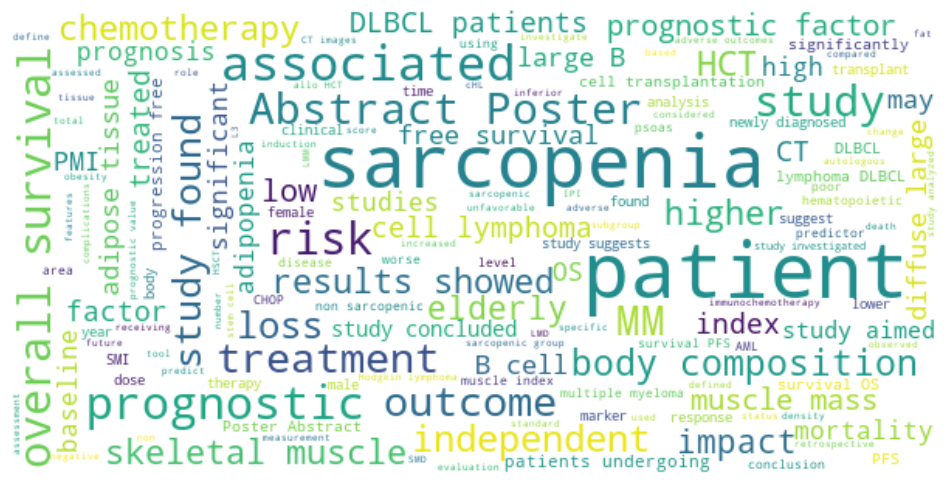

In [38]:
from wordcloud import WordCloud, STOPWORDS

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["and", "the", "or", "with", "so"])

text = ' '.join(dataframe_one['AI Summary (200 Words)'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=150, 
                      background_color="white", width=600, height=300).generate(text)

plt.figure(figsize=(12, 9))  # adjust figsize to your needs
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

&nbsp;

# Y-Data Report Summary

In [39]:
profile = ProfileReport(dataframe_one, title="Scoping Review")
profile.to_file("Scoping_Review_YData.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]